<a href="https://colab.research.google.com/github/flavjoxhelollari/CS480-Artificial-Intelligence/blob/main/MNIST_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Firstyl, lets import the necessary libraries 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


# Now let's import the necessary datasets
from torchvision import datasets, transforms
train_data = datasets.MNIST(root="./datasets", train = True, transform = transforms.ToTensor(), download = True)
test_data = datasets.MNIST(root="./datasets", train = False, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


This is number : 0


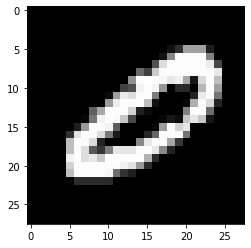

In [35]:
# Now let's check how data is stored in our dataset
image, label = train_data[49111]
#Plot
image = image.reshape([28,28])
plt.imshow(image, cmap = "gray")
print("This is number : {}".format(label) )

In [3]:
# Make use of DataLoader 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)
# Now get a batch
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()

In [4]:
# We treat input as flat vector since its simple
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))


The shape of input x: torch.Size([100, 784])


In [5]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
# 10- number of cases, 784 is the dimension of data
W.requires_grad_()

# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)
y = torch.matmul(x, W) + b

print(y[0,:])

tensor([ 0.1680, -0.1148,  0.0783, -0.2707, -0.2416, -0.4167, -0.4157,  0.2498,
        -0.0658,  0.3563], grad_fn=<SliceBackward>)


In [6]:
py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

py[0] from equation: tensor([0.1223, 0.0922, 0.1118, 0.0789, 0.0812, 0.0682, 0.0682, 0.1327, 0.0968,
        0.1477], grad_fn=<SelectBackward>)


In [7]:
# Cross-entropy loss from equation
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

cross entropy from equation: 2.2739310264587402


In [8]:
optimizer = torch.optim.SGD([W,b], lr=0.1)
cross_entropy_eq.backward()

In [9]:
b.grad

tensor([-0.0024,  0.0016, -0.0436, -0.0051, -0.0339,  0.0384,  0.0476, -0.0204,
        -0.0290,  0.0468])

In [10]:
optimizer.step()

In [17]:
import torch.nn.functional as F

for images, labels in train_loader:
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

In [27]:
#testing
correct = 0
total = len(test_data)

with torch.no_grad():
  x = images.view(-1, 28*28)
  y = torch.matmul(x,W) + b 

  predictions = torch.argmax(y, dim = 1)
  correct += torch.sum((predictions == labels).float())
print('test accuracy :{} %'.format(correct*10000/total))

test accuracy :87.0 %
